### group members
* Max Dunger
* [Yannik Motzet](mailto:yannik.motzet@outlook.com)

# Übung 1: Explorative Analyse und Vorverarbeitung
## 1. Explorative Analyse des Datensatzes “Boston Housing”


### a) EDA

In [ ]:
import numpy as np
import pandas as pd
np.__version__, pd.__version__, 

('1.18.5', '1.1.3')

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url, sep =' ', skipinitialspace = True , header = None, names = cols , index_col = False)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
np.shape(boston)

(506, 14)

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

In [ ]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

Entfernen aller Zeilen bzw. Messungen mit NaN und aller doppelter Einträge.

In [ ]:
boston.isna().any()
# boston = boston.dropna()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [ ]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [ ]:
boston.duplicated().any()
# boston = boston.drop_duplicates()

False

Explorative Statistiken

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Streumatrix

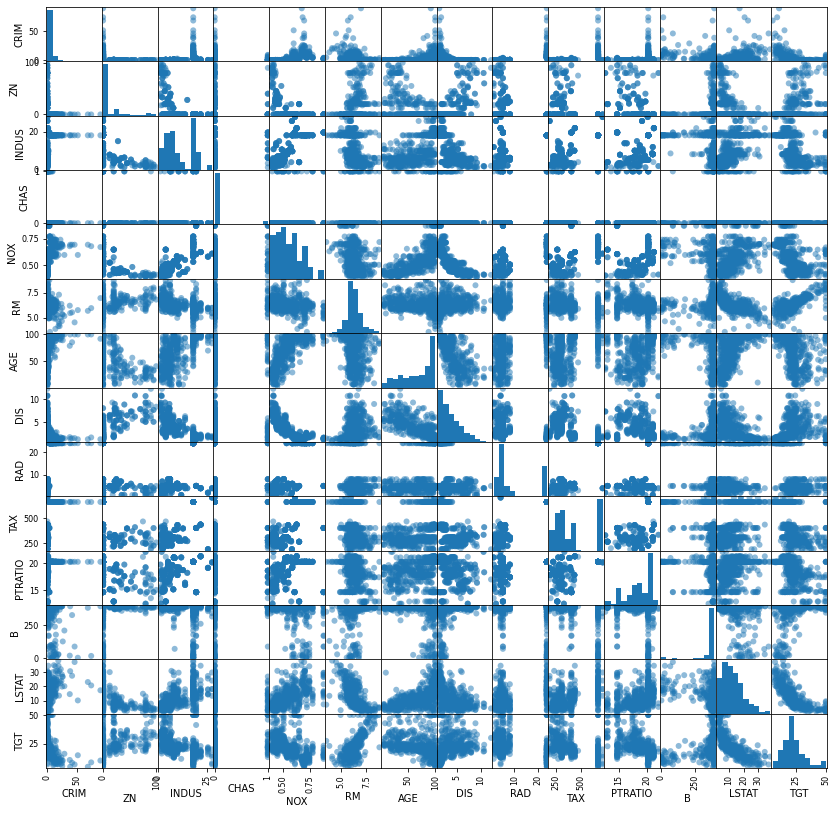

In [ ]:
pd.plotting.scatter_matrix(boston, figsize=(14,14), marker='o');

### b)
**Frage:** Welche Variablen sind kategorisch? \
**Antwort:** rad: index of accessibility to radial highways (1, 2, 3), chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

In [ ]:
boston['RAD'].unique(), boston['CHAS'].unique()

(array([ 1,  2,  3,  5,  4,  8,  6,  7, 24]), array([0, 1]))

**Frage:** Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? \
**Antwort:** Variablen mit großer Co-Varianz mit TGT: RM (Raumanzahl) und LSTAT ()

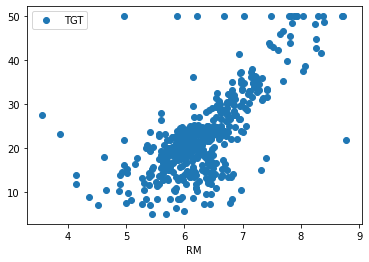

In [ ]:
boston.plot(x='RM', y='TGT', style=['o','rx'])

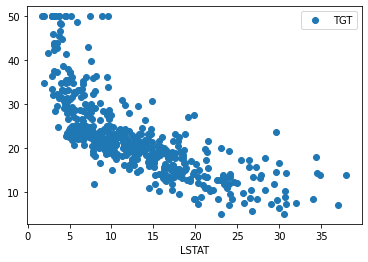

In [ ]:
boston.plot(x='LSTAT', y='TGT', style=['o','rx'])

**Frage:** Welche dieser Variablen sind miteinander korreliert? \
**Antwort:** siehe plots oben \
\
**Frage:** Welche sind daher Kandidaten, die man evtl. weglassen könnte? \
**Antwort:** Variablen mit geringer Co-Varianz bzw. fehlendes Muster in Scatterplot